<a href="https://colab.research.google.com/github/elleniayele/Prediction-of-Product-Sales1/blob/main/Project_2_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The company that wants to know how additional charges will be based on the age, sex, BMI, number of children, smoking habit, and region of the patient.

the data is a regression problem since we are predicting additional charges

In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
import matplotlib.pyplot as plt
import seaborn as sns
set_config(display='diagram')

In [2]:
df = pd.read_csv('/content/insurance.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/insurance.csv'

removing customer id column and customer ID since we already have an index by default, it is unnecessary to our features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


lets try to see the correlation between the features

checking for duplicated values

In [ ]:
df.duplicated().sum()

1

there is 1336 duplicated rows, we are going to remove them

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

checking for missing data

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

no missing values so no imputers

checking for any inconcistencies

In [ ]:
for col in df:
  print(col)
  print(df[col].unique())
  print('\n\n')

age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]



sex
['female' 'male']



bmi
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.

In [ ]:
corr=df.corr()

<ipython-input-49-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


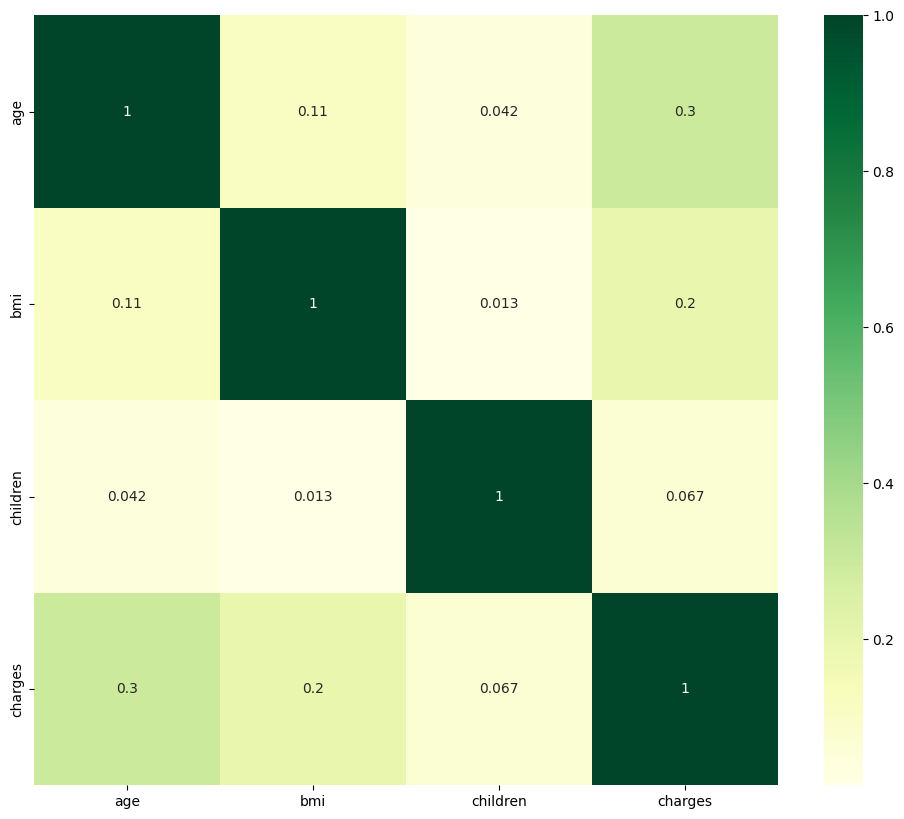

In [ ]:
fig, ax = plt.subplots(figsize = (12, 10))
ax = sns.heatmap(corr, cmap= 'YlGn', annot=True);

in here, age and charges are a bit correlated to each other but other featues have postive but little correlation, let's investigate further.

##lets visualize the data

Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.

Text(0.5, 1.0, 'age vs bmi')

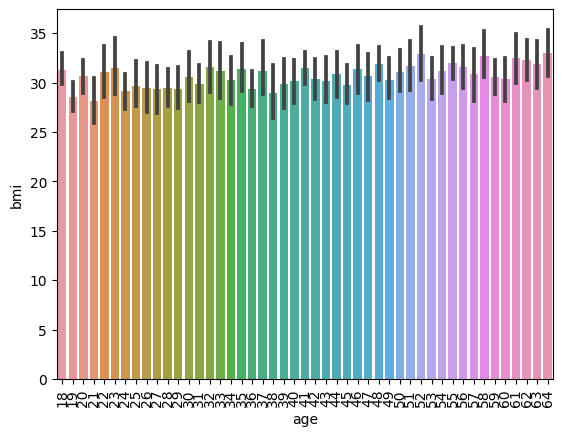

In [ ]:
sns.barplot(data=df, y='bmi', x='age');
plt.xticks(rotation=90)
ax.set_title('age vs bmi')

from this data, the age and bmi are not correlated, no way of determining if they are related to each other or not

---



Text(0.5, 1.0, 'age vs charges')

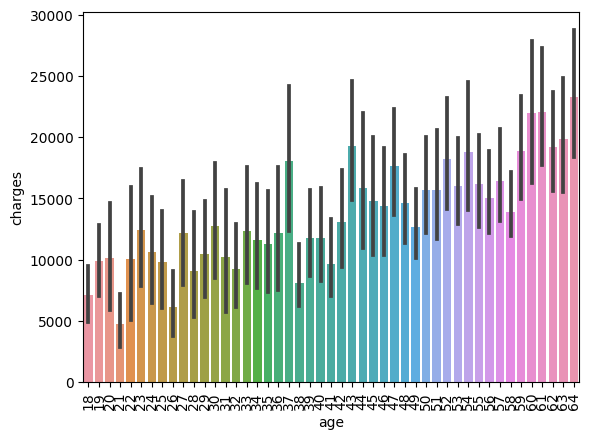

In [ ]:
sns.barplot(data=df, y='charges', x='age');
plt.xticks(rotation=90)
ax.set_title('age vs charges')

in here, it can be seen that with age, the charges increase.

Text(0.5, 1.0, 'children vs charges')

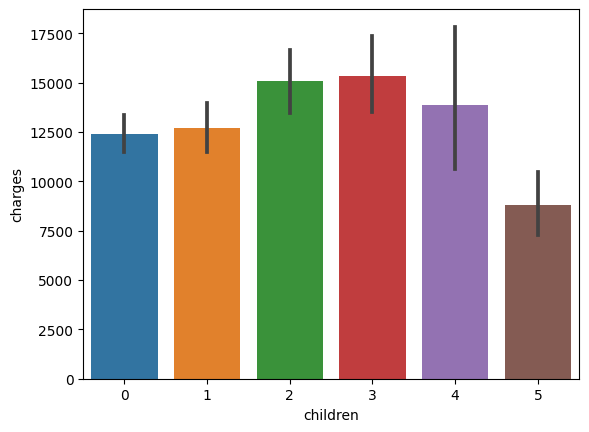

In [ ]:
sns.barplot(data=df, y='charges', x='children');
ax.set_title('children vs charges')

In here, it can be shown as people with no childeren and up to 3 children, the charges increase while after 3 kids, the charges drop again.

so as can be seen if i choose just two visualizations from all these

Text(0.5, 1.0, 'age vs charges')

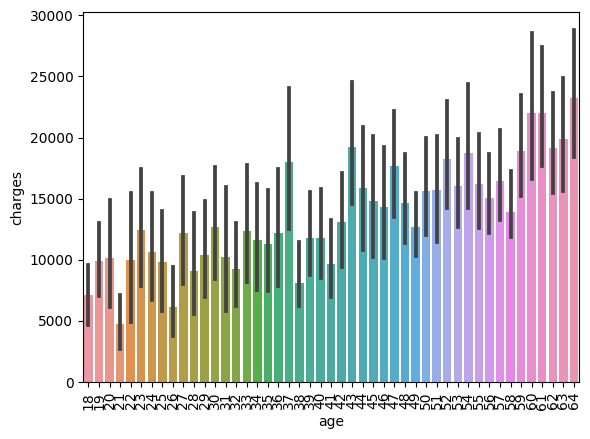

In [ ]:
sns.barplot(data=df, y='charges', x='age');
plt.xticks(rotation=90)
ax.set_title('age vs charges')

Text(0.5, 1.0, 'children vs charges')

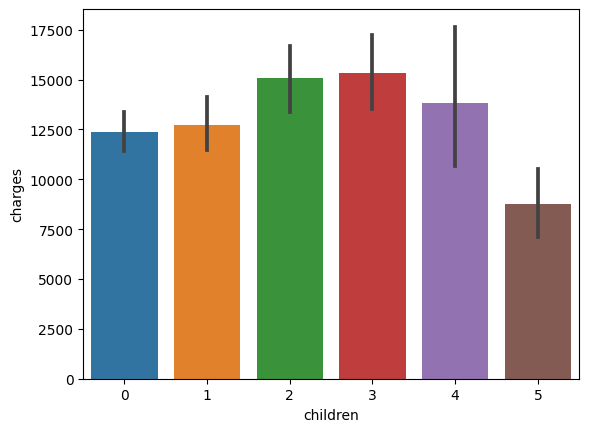

In [ ]:
sns.barplot(data=df, y='charges', x='children');
ax.set_title('children vs charges')

as can be seen from the data, the charges increase by age as age increases charges increase which means that older people get to pay more or be charged more or will have additional charges since they are more riskier while younger people will be asked to pay less. people with childern up to 3 kids will be charged more as the no. of children increases while children after 3 kids will be asked to pay less.

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('charges', axis=1)
y=df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
num_selector= make_column_selector(dtype_include= 'number')
cat_selector= make_column_selector(dtype_include= 'object')

In [ ]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
#catagorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple,remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd410e08190>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd410e093c0>)])

In [ ]:
preprocessor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd410e08190>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd410e093c0>)])

In [ ]:
#transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed

array([[-0.8629477 , -0.76233578, -0.91222776, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.71517467,  0.50682967,  1.59660724, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.49772799, -0.28494327,  0.7603289 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.36424928, -1.43268136, -0.07594943, ...,  0.        ,
         0.        ,  1.        ],
       [-0.07518809, -0.43464824,  1.59660724, ...,  0.        ,
         0.        ,  1.        ],
       [-0.29003162,  0.87277515,  0.7603289 , ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
linreg_pipe = make_pipeline(preprocessor,LinearRegression())
linreg_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd410e08190>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd410e093c0>)])),
                ('linearregression', LinearRegression())])

In [78]:
training_predictions = linreg_pipe.predict(X_train)
test_predictions = linreg_pipe.predict(X_test)

lets evaluate the metrix

In [79]:
df['charges'].median()

9386.1613

In [ ]:
train_MAE= mean_absolute_error(y_train,training_predictions)
test_MAE= mean_absolute_error(y_test,test_predictions)
print(f'model training r2:{train_MAE}')
print (f'model testing r2:{test_MAE}')

model training r2:4207.532348083832
model testing r2:4068.512605131343


 In here, we can say that our model was off on predictions by $4207.53  the
training set, it was off on predictions by $4068.51. that means that since the
median price for charges is $9386.16, it was off on it's predictions by about 44.82 on average. and our model is correctly predicting 0.551%.

In [ ]:
train_MSE= mean_squared_error(y_train,training_predictions)
test_MSE= mean_squared_error(y_test,test_predictions)
print(f'model training r2:{train_MSE}')
print (f'model testing r2:{test_MSE}')

model training r2:37182119.09106153
model testing r2:35276479.75387868


since mean squared error penalizes large errors , the errors for testing and training are as shown above.

In [ ]:
train_RMSE= mean_squared_error(y_train,training_predictions,squared=False)
test_RMSE= mean_squared_error(y_test,test_predictions,squared=False)
print(f'model training r2:{train_RMSE}')
print (f'model testing r2:{test_RMSE}')

model training r2:6097.714251345461
model testing r2:5939.4006224432005


the mean absolute error of the testing data was 4207 but the rmse is a little larger. it means while our average error was 4207, it's making larger errors.

the model is not overfit or underfit, it is well balanced, i see that the problem with a reduction of accuracy of predictions is due to the datas not related to each other that much including the target , i would suggest getting more data to get better results.